In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [5]:
mnist_train = tfds.load(name="mnist", split="train")
assert isinstance(mnist_train, tf.data.Dataset)
print(mnist_train)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [6]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

Label: 4


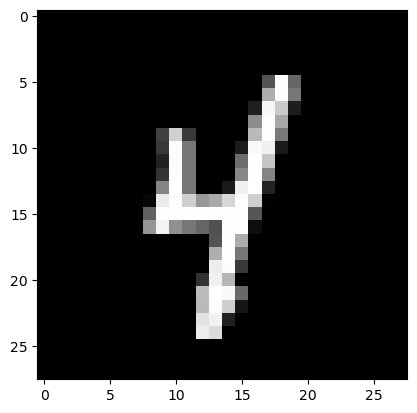

In [7]:
for mnist_example in mnist_train.take(1): # Only take a single example
   image, label = mnist_example["image"], mnist_example["label"]
   plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
   print("Label: %d" % label.numpy())

In [18]:
import tensorflow_datasets as tfds

# Load the MNIST dataset
mnist_builder = tfds.builder('mnist')
mnist_builder.download_and_prepare()

# Get dataset info
info = mnist_builder.info
print(info)


tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\SURFACE\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""

In [19]:
mnist_train = mnist_train.repeat().shuffle(1024).batch(32)
mnist_train = mnist_train.prefetch(tf.data.experimental.AUTOTUNE)

In [21]:
print(info.features)
print(info.features["label"].num_classes)
print(info.features["label"].names)

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})
10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [22]:
mnist_test, info = tfds.load("mnist", split="test", with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\SURFACE\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""

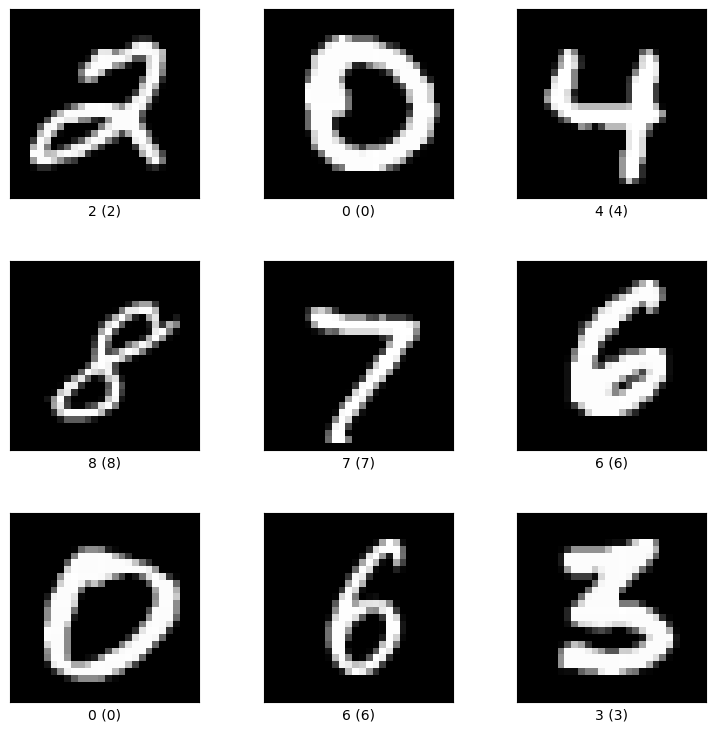

In [24]:
fig = tfds.show_examples(mnist_test, info)


In [26]:
mnist_train

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>

In [27]:
import tensorflow as tf
import numpy as np

In [28]:
num_classes = 10 # 0 to 9 digits
num_features = 784 # 28*28
# Training parameters.
learning_rate = 0.001
training_steps = 500
batch_size = 256
display_step = 100

In [29]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), \
x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

11490434/11490434 [==============================] - 7s 1us/step


In [30]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [32]:
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.zeros([num_classes]), name="bias")
# Logistic regression (Wx + b).
def logistic_regression(x):
# Apply softmax to normalize the logits to a probability distribution.
   return tf.nn.softmax(tf.matmul(x, W) + b)
# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
# Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
# Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
# Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))
# Accuracy metric.
def accuracy(y_pred, y_true):
# Predicted class is the index of highest
# score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1),
    tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(
    correct_prediction, tf.float32))
# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [36]:
def run_optimization(x, y):
# Wrap computation inside a GradientTape for automatic differentiation.
     with tf.GradientTape() as g:
         pred = logistic_regression(x)
         loss = cross_entropy(pred, y)
# Compute gradients.
     gradients = g.gradient(loss, [W, b])
# Update W and b following gradients.
     optimizer.apply_gradients(zip(gradients, [W, b]))

In [38]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
# Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
if step % display_step == 0:
   pred = logistic_regression(batch_x)
   loss = cross_entropy(pred, batch_y)
   acc = accuracy(pred, batch_y)
   print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 500, loss: 76.642334, accuracy: 0.925781


In [39]:
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.910200


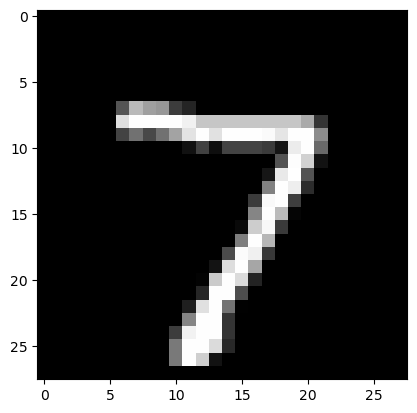

Model prediction: 7


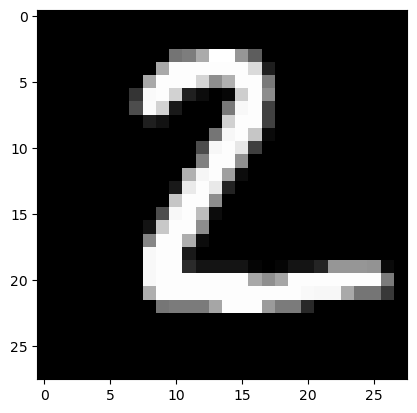

Model prediction: 2


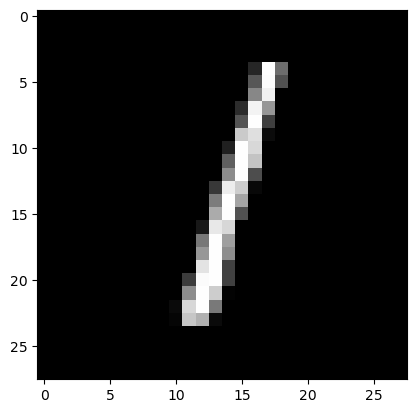

Model prediction: 1


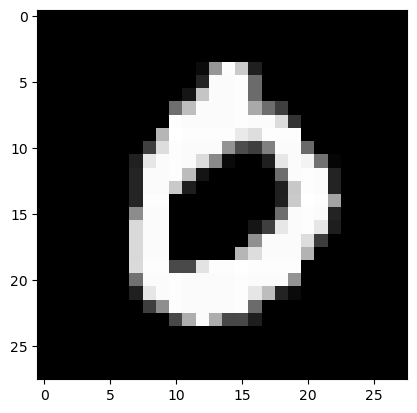

Model prediction: 0


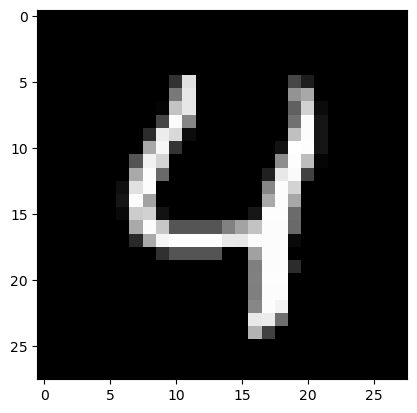

Model prediction: 4


In [41]:
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)
# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))